In [1]:
!pip uninstall -y scikit-learn

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0


In [2]:
!pip install -U scikit-learn==1.3.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 42.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


Accuracy: 98.73%
Confusion Matrix:
[[ 584    1]
 [  27 1590]]
Precision (Class 0): 0.96
Precision (Class 1): 1.00
Recall (Class 0): 1.00
Recall (Class 1): 0.98
F1-score (Class 0): 0.98
F1-score (Class 1): 0.99
ROC-AUC: 1.00


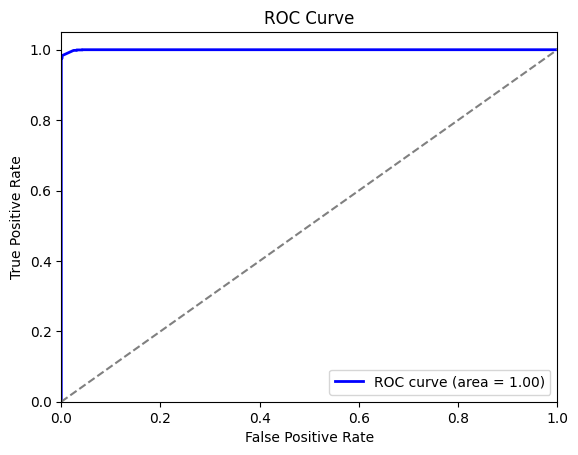

Cross-validated Accuracy: 98.61%
Cross-validated Precision: 0.99
Cross-validated Recall: 1.00
Cross-validated F1-score: 0.99
Cross-validated ROC-AUC: 1.00


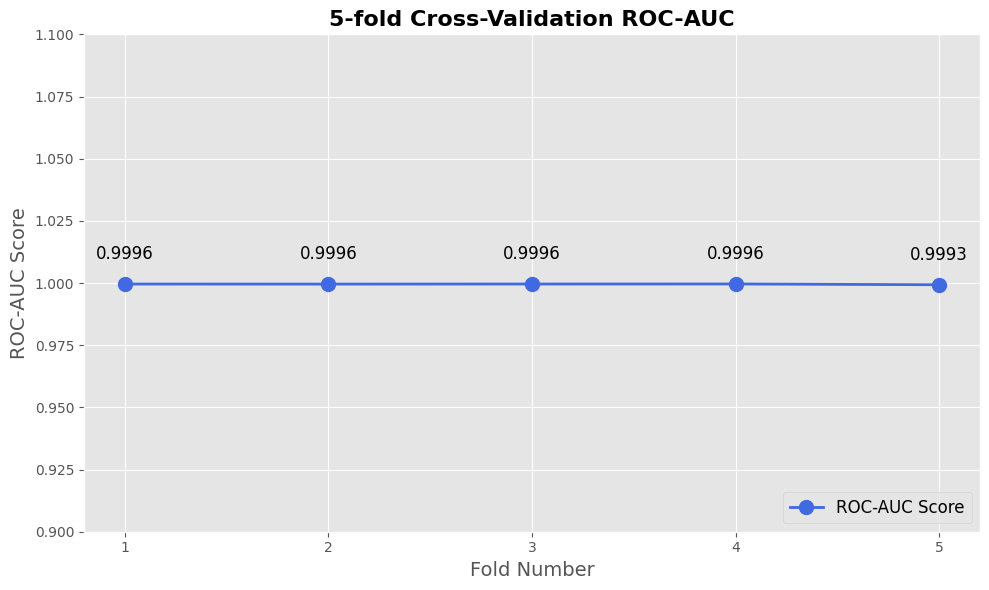

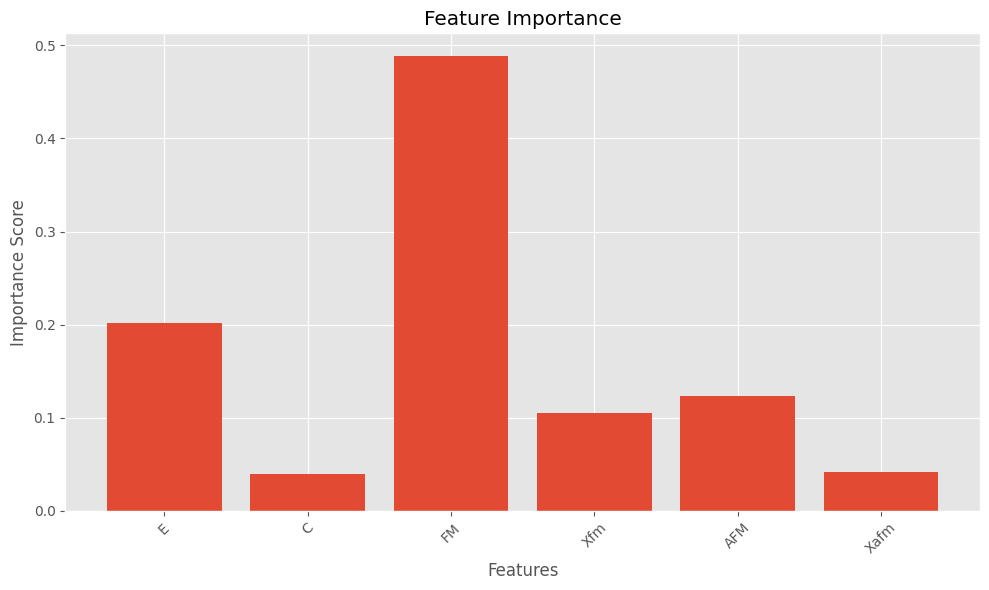

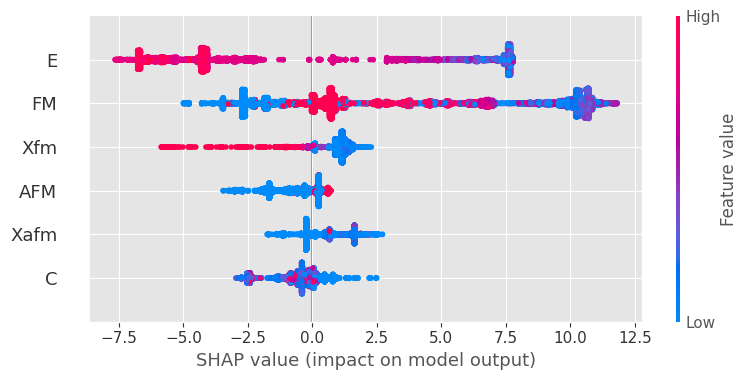

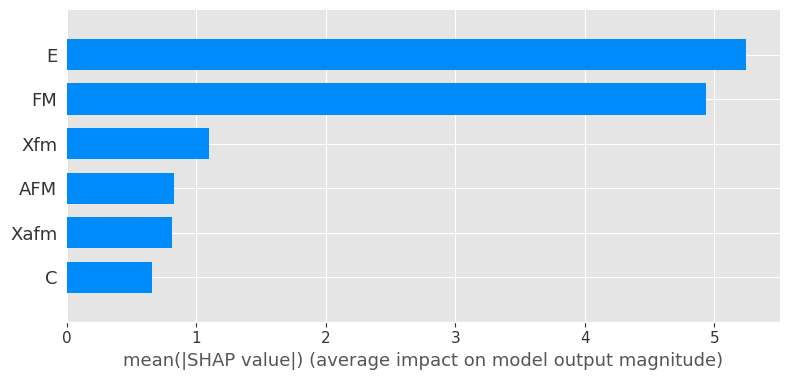

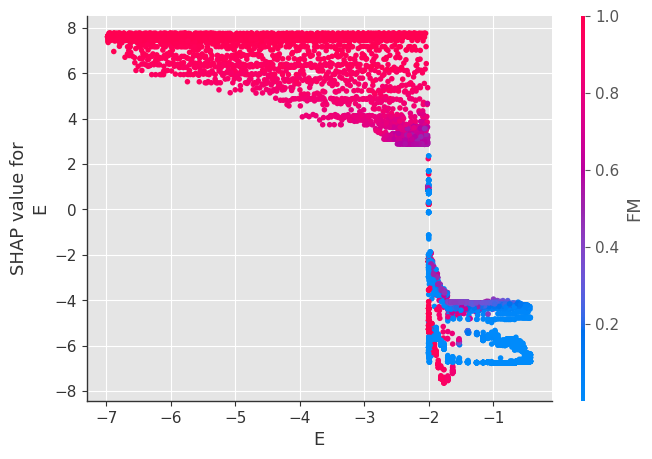

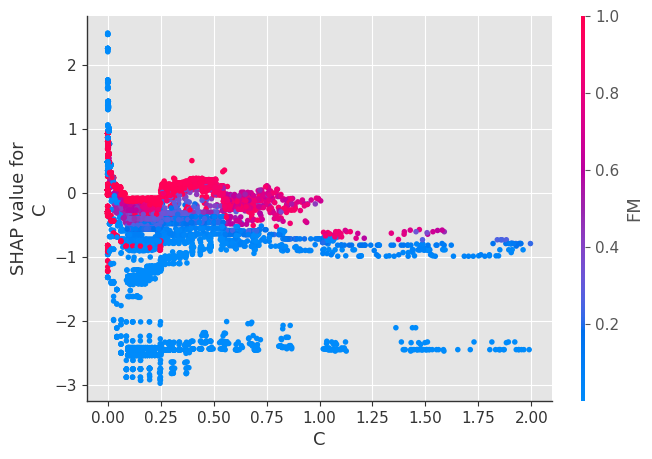

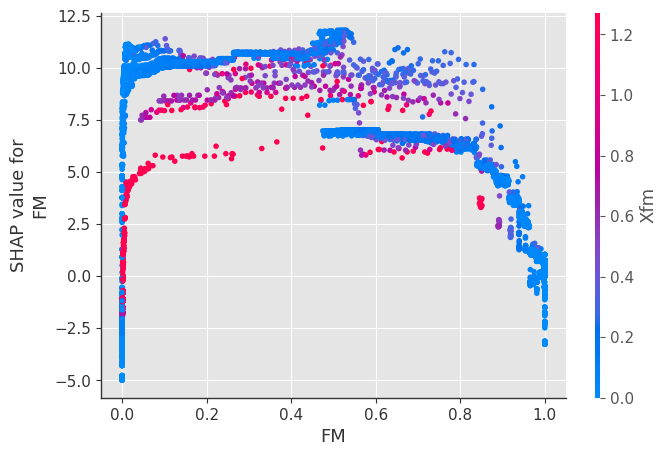

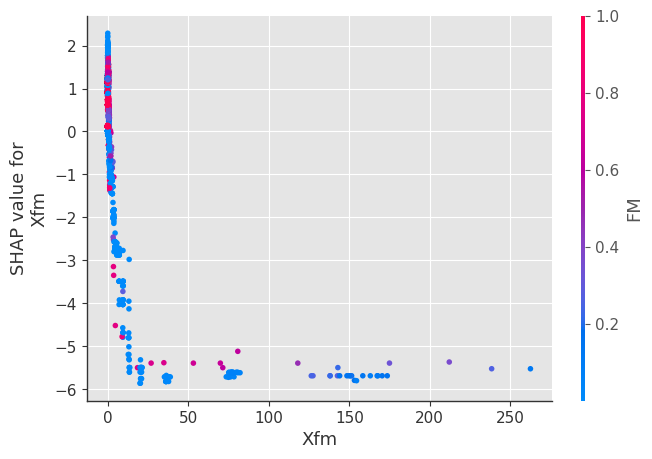

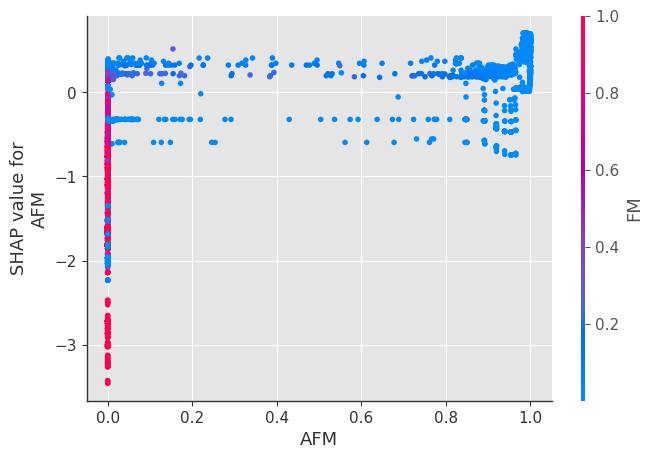

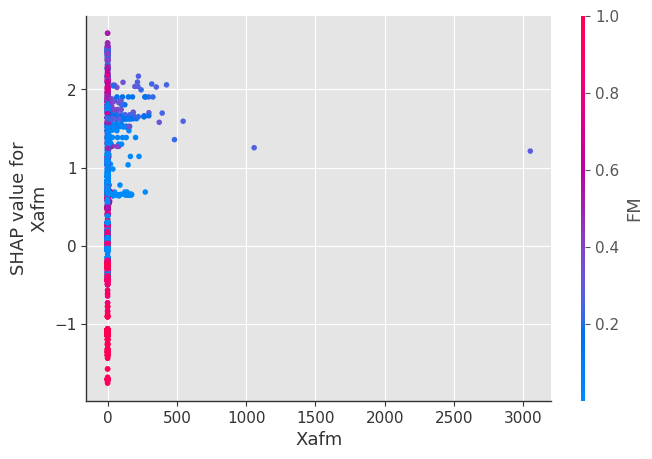

In [3]:
# Импортируем необходимые библиотеки
import pandas as pd  # Для работы с данными
from xgboost import XGBClassifier  # Для работы с алгоритмом XGBoost
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold  # Для разделения данных и кросс-валидации
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve)  # Метрики для оценки модели
import matplotlib.pyplot as plt  # Для построения графиков
import numpy as np  # Для работы с массивами данных
import shap  # Для объяснения модели и анализа признаков

# Подгружаем наш датасет
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/AI_phase_diagram/Final_version/data/Main_Data_Model_0_1.csv')  # Читаем CSV файл в датафрейм

# Разделение данных
Y = data["h"]
X = data[["E", "C", "FM", "Xfm", "AFM", "Xafm"]]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # 80% для обучения, 20% для теста

# Создание и обучение модели XGBoost
model = XGBClassifier()  # Создаем классификатор XGBoost
model.fit(X_train, y_train)  # Обучаем модель на тренировочных данных

# Предсказания на тестовых данных
y_pred = model.predict(X_test)  # Делаем предсказания на тестовом наборе

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)  # Вычисляем точность предсказаний
print(f"Accuracy: {accuracy * 100:.2f}%")  # Выводим точность в процентах

# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_pred)  # Матрица ошибок
print(f"Confusion Matrix:\n{cm}")  # Выводим матрицу ошибок

# Метрики Precision для обоих классов
precision_zero = precision_score(y_test, y_pred, pos_label=0)  # Precision для класса 0
precision_one = precision_score(y_test, y_pred, pos_label=1)  # Precision для класса 1
print(f"Precision (Class 0): {precision_zero:.2f}")  # Вывод Precision для класса 0
print(f"Precision (Class 1): {precision_one:.2f}")  # Вывод Precision для класса 1

# Метрики Recall для обоих классов
recall_zero = recall_score(y_test, y_pred, pos_label=0)  # Recall для класса 0
recall_one = recall_score(y_test, y_pred, pos_label=1)  # Recall для класса 1
print(f"Recall (Class 0): {recall_zero:.2f}")  # Вывод Recall для класса 0
print(f"Recall (Class 1): {recall_one:.2f}")  # Вывод Recall для класса 1

# Метрики F1-score для обоих классов
f1_zero = f1_score(y_test, y_pred, pos_label=0)  # F1-score для класса 0
f1_one = f1_score(y_test, y_pred, pos_label=1)  # F1-score для класса 1
print(f"F1-score (Class 0): {f1_zero:.2f}")  # Вывод F1-score для класса 0
print(f"F1-score (Class 1): {f1_one:.2f}")  # Вывод F1-score для класса 1

# Предсказания вероятностей для положительного класса и ROC-AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Предсказания вероятностей для положительного класса (1)
roc_auc = roc_auc_score(y_test, y_pred_prob)  # Вычисление ROC-AUC
print(f"ROC-AUC: {roc_auc:.2f}")  # Вывод ROC-AUC

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # Вычисление точек для ROC-кривой
plt.figure()  # Создаем новый график
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # Построение ROC-кривой
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Диагональ "случайного угадывания"
plt.xlim([0.0, 1.0])  # Устанавливаем границы оси X
plt.ylim([0.0, 1.05])  # Устанавливаем границы оси Y
plt.xlabel('False Positive Rate')  # Подпись оси X
plt.ylabel('True Positive Rate')  # Подпись оси Y
plt.title('ROC Curve')  # Заголовок графика
plt.legend(loc="lower right")  # Расположение легенды
plt.show()  # Показываем график

# 5-кратная кросс-валидация с разными метриками
kfold = StratifiedKFold(n_splits=5, shuffle=True)  # Создаем стратегию кросс-валидации с 5 разбиениями

# Кросс-валидация по точности
accuracy_scores = cross_val_score(model, X, y=Y, cv=kfold, scoring='accuracy')  # Кросс-валидация по метрике точности
print(f"Cross-validated Accuracy: {accuracy_scores.mean() * 100:.2f}%")  # Вывод средней точности по кросс-валидации

# Кросс-валидация по Precision, Recall, F1 и ROC-AUC
precision_scores = cross_val_score(model, X, Y, cv=kfold, scoring='precision')  # Precision
recall_scores = cross_val_score(model, X, Y, cv=kfold, scoring='recall')  # Recall
f1_scores = cross_val_score(model, X, Y, cv=kfold, scoring='f1')  # F1-score
roc_auc_scores = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')  # ROC-AUC

print(f"Cross-validated Precision: {precision_scores.mean():.2f}")  # Средний Precision по кросс-валидации
print(f"Cross-validated Recall: {recall_scores.mean():.2f}")  # Средний Recall по кросс-валидации
print(f"Cross-validated F1-score: {f1_scores.mean():.2f}")  # Средний F1-score по кросс-валидации
print(f"Cross-validated ROC-AUC: {roc_auc_scores.mean():.2f}")  # Средний ROC-AUC по кросс-валидации

# Визуализация кросс-валидационных ROC-AUC результатов
plt.style.use('ggplot')  # Стиль графика
plt.figure(figsize=(10, 6))  # Задаем размер графика
folds = np.arange(1, len(roc_auc_scores) + 1)  # Создаем массив с номерами фолдов
plt.plot(folds, roc_auc_scores, marker='o', markersize=10, linestyle='-', color='royalblue', linewidth=2, label='ROC-AUC Score')  # График ROC-AUC
for i, score in enumerate(roc_auc_scores):  # Добавляем текстовые метки с результатами для каждого фолда
    plt.text(folds[i], score + 0.01, f'{score:.4f}', ha='center', fontsize=12, color='black')
plt.ylim(0.9, 1.1)  # Устанавливаем границы по Y
plt.xticks(folds)  # Подписи на оси X
plt.xlabel('Fold Number', fontsize=14)  # Подпись оси X
plt.ylabel('ROC-AUC Score', fontsize=14)  # Подпись оси Y
plt.title('5-fold Cross-Validation ROC-AUC', fontsize=16, fontweight='bold')  # Заголовок графика
plt.grid(True)  # Включаем сетку
plt.legend(loc='lower right', fontsize=12)  # Легенда
plt.tight_layout()  # Автоматическое размещение элементов
plt.show()  # Показываем график

# Визуализация важности признаков
plt.figure(figsize=(10, 6))  # Задаем размер графика
plt.title('Feature Importance')  # Заголовок графика
plt.bar(range(len(model.feature_importances_)), model.feature_importances_, align='center')  # Столбчатая диаграмма важности признаков
plt.xticks(range(len(X.columns)), X.columns, rotation=45)  # Подписи осей X с названиями признаков
plt.xlabel('Features')  # Подпись оси X
plt.ylabel('Importance Score')  # Подпись оси Y
plt.tight_layout()  # Автоматическое размещение элементов
plt.show()  # Показываем график

# Создание Explainer для модели XGBoost и расчет SHAP значений
explainer = shap.TreeExplainer(model)  # Создаем объяснитель модели XGBoost
shap_values = explainer.shap_values(X_train)  # Вычисляем SHAP значения для обучающих данных

# Построение сводного графика SHAP
shap.summary_plot(shap_values, X_train)  # Построение стандартного сводного графика SHAP (точечный график), отображающего влияние каждого признака на предсказания
shap.summary_plot(shap_values, X_train, plot_type="bar")  # Построение сводного графика в виде столбчатой диаграммы, отображающей среднюю важность каждого признака

# Построение графиков зависимости SHAP для каждого признака
for name in X_train.columns:  # Цикл по каждому признаку
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train)  # График зависимости для каждого признака